In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
import os
os.chdir("/content/drive/MyDrive/AINN_Resources/lab/datasets")
!ls

BangaloreHousingPrices.csv  BostonHousePrices.gsheet  linear_regression.png
BostonHousePrices.csv	    golf_dataset.csv


In [4]:
!ls

BangaloreHousingPrices.csv  BostonHousePrices.gsheet  linear_regression.png
BostonHousePrices.csv	    golf_dataset.csv


In [5]:
import pandas as pd
data =pd.read_csv('BostonHousePrices.csv')

In [6]:
data.head(3)

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model


In [9]:
dataset=pd.read_csv("BostonHousePrices.csv")


In [10]:
dataset.columns

Index(['Rooms', 'Distance', 'Value'], dtype='object')

In [11]:
dataset

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [12]:
dataset.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


In [13]:
x=dataset['Rooms'] # independent variable
y=dataset['Value'] # dependent variable

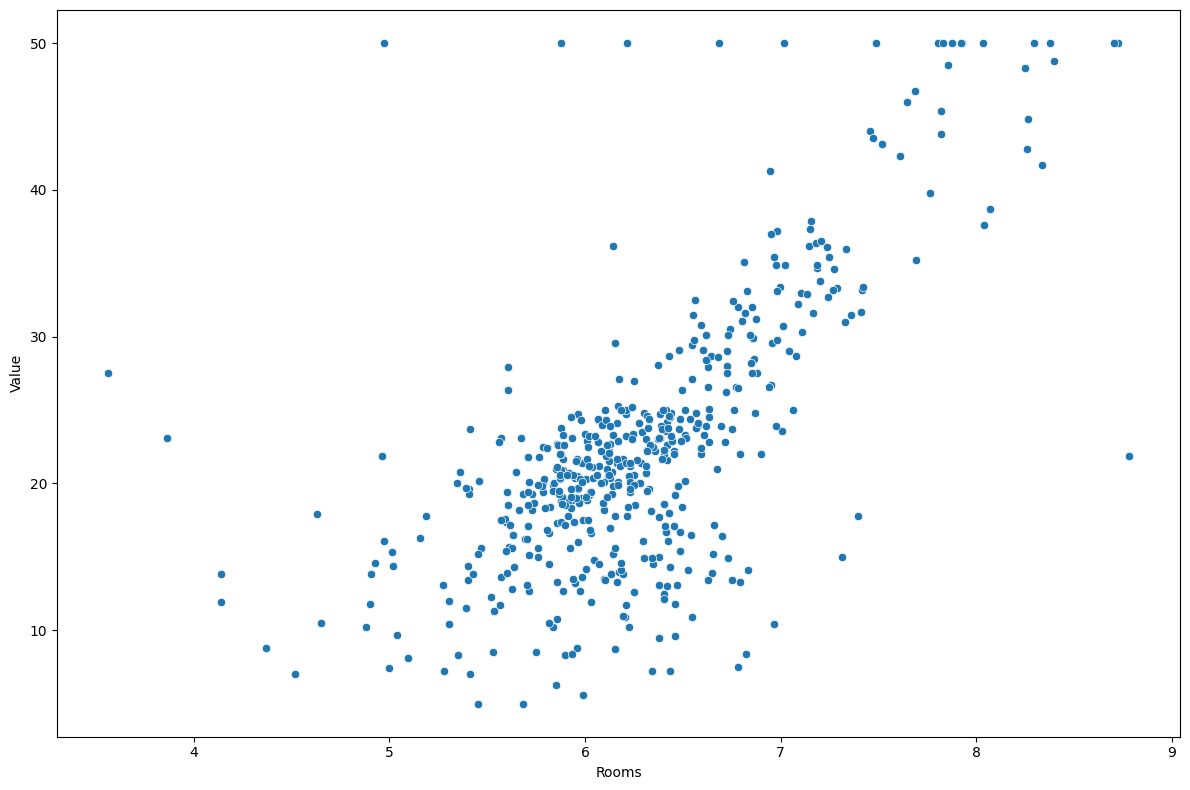

In [14]:
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x, y=y)
plt.show()

In [15]:
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model

In [16]:
y_=lm.predict(x)

In [17]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           2.49e-74
Time:                        15:40:03   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Rooms coef: 9.1021
# Constant coef: - 34.6706

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 9.1021*x['Rooms'] - 34.6706